# CRISP DM Exercise

**The feathers are**
- Gender
- Age
- Annual_Income
- Spending_Score

## Import the data using **pandas**

In this step, we load the dataset `Mall_Customers.csv` using the `pandas` library. This dataset contains information about customers, including their `CustomerID`, `Gender`, `Age`, `Annual_Income`, and `Spending_Score`.Import the data using **pandas**.

In [2]:
import pandas as pd

data = pd.read_csv("./../data/Mall_Customers.csv")
data.head(5)

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Cleaning the Data

Using `.isnull().sum()` to check for any missing or null values in the dataset. This helps in understanding the completeness of the data and identifying columns that may require cleaning or imputation. 

In [3]:
data.isnull().sum()

CustomerID        0
Gender            0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64

In this section, we address missing values in the dataset. Missing values can lead to inaccurate analysis and predictions, so it is essential to handle them appropriately. We use the `.isnull().sum()` method to identify missing values in each column and then apply strategies to clean the data, such as imputing missing values or dropping unnecessary columns. The cleaned dataset is stored in the variable `cleanData`.

In [4]:

cleanData = data.drop(columns=["CustomerID"])
def whoIsMin():
    noMale = cleanData["Gender"].isin(["Male"]).count()
    noFemale = cleanData["Gender"].isin(["Female"]).count()
    if (noMale < noFemale):
        return "Female"
    else:
        return "Male"

for index in cleanData[cleanData["Gender"].isnull()].index:
    cleanData.at[index, "Gender"] = whoIsMin()

print(f"Original data:\n"+
    f"Male: {data["Gender"].isin(["Male"]).sum()}\n"+
    f"Female: {data["Gender"].isin(["Female"]).sum()}\n"+
    f"Total: {data["Gender"].isin(["Male", "Female"]).sum()}\n")

print(f"Cleaned data:\n"+
    f"Male: {cleanData["Gender"].isin(["Male"]).sum()}\n"+
    f"Female: {cleanData["Gender"].isin(["Female"]).sum()}\n"+
    f"Total: {cleanData["Gender"].isin(["Male", "Female"]).sum()}")

cd = cleanData

Original data:
Male: 89
Female: 111
Total: 200

Cleaned data:
Male: 89
Female: 111
Total: 200


## Graphinng

Importing relivant libraries

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

Graphing the **Age Distribution**

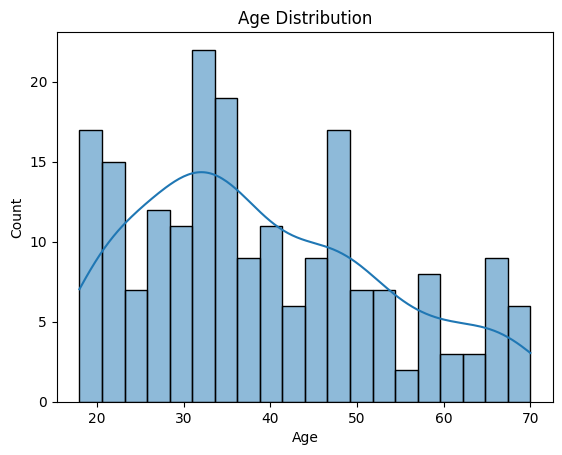

In [6]:
sns.histplot(cd['Age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

Graphing the scater plot of age vs income

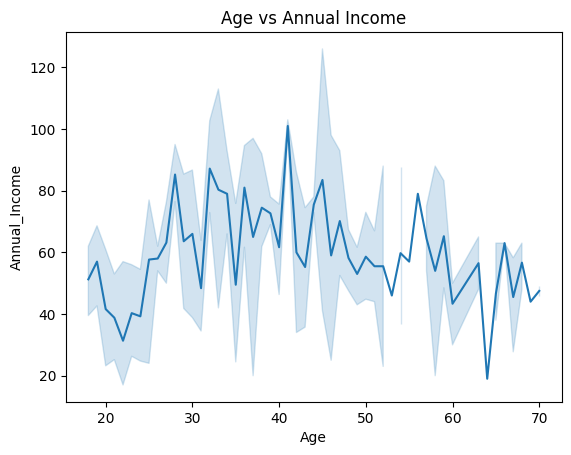

In [7]:
sns.lineplot(x='Age', y='Annual_Income', data=cd)
plt.title("Age vs Annual Income")
plt.show()

## Scaling and Clustering the data

Importing the nessasery libraies (modules)

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

Select Relevant Features

In [9]:
features = cleanData[['Age', 'Annual_Income', 'Spending_Score']]
features.head()

,Age,Annual_Income,Spending_Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


Standardize the Features

In [10]:
scalar = StandardScaler()
scaledFratures = scalar.fit_transform(features)
print(scaledFratures[:10])
print(type(scaledFratures))

[[-1.41701426 -1.74686201 -0.42508461]
 [-1.27456497 -1.74686201  1.20910793]
 [-1.34578961 -1.70847365 -1.70909303]
 [-1.13211569 -1.70847365  1.05347054]
 [-0.56231855 -1.6700853  -0.38617526]
 [-1.20334033 -1.6700853   1.0145612 ]
 [-0.27741998 -1.63169695 -1.70909303]
 [-1.13211569 -1.63169695  1.71492943]
 [ 1.78809464 -1.59330859 -1.82582106]
 [-0.63354319 -1.59330859  0.85892381]]
<class 'numpy.ndarray'>


Apply the Elbow Method to Find Optimal k

In [11]:
inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaledFratures)
    inertia.append(kmeans.inertia_)


Plot the Elbow Curve

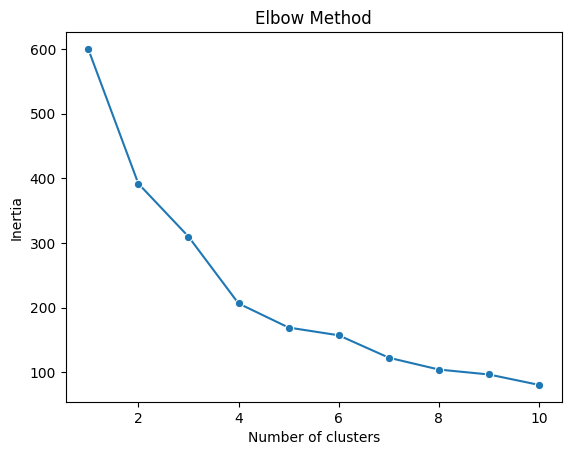

In [12]:
sns.lineplot(x=range(1,11), y=inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

In [13]:
from sklearn.model_selection import train_test_split